# <center>Data Acquisition</center><a class="jp-toc-ignore"></a>
## <center>D205 Performance Assessment<center><a class="jp-toc-ignore"></a>
<br>

#### <center>Ashley Jensen<center><a class="jp-toc-ignore"></a>
#### <center>Western Governors University<center><a class="jp-toc-ignore"></a>
#### <center>Instructor: David Gagner</center><a class="jp-toc-ignore"></a>
<br>

## A. Question

__Is fiber optic or DSL internet service more common for customers with three months or less tenure with the provider?__

### 1. Data Needed from Each Table 

&emsp;To answer the research question, the `customer` table from the original set of tables and the `service` table add-on must be joined on their respective `customer_id` columns, as it is the primary key for both tables and a foreign key in the `service table`. From the `customer` table, we can filter on the `tenure` column to narrow the results to customers who have joined in the last three months or less. Using the `internet_service` column from the `service` table, we can group by fiber optic or DSL internet service, which returns the count of each type as a result.

Original Set: `customer(customer_id (text), tenure (numeric))`
<br>
<br>Add-On CSV: `service(customer_id (varchar(20)), internet_service (varchar(20)))`

## B.	Logical Data Model 

<div class="alert alert-block alert-info">
Entity-Relation Diagram (ERD) generated through pgAdmin 4. <i>(Page)</i></div>

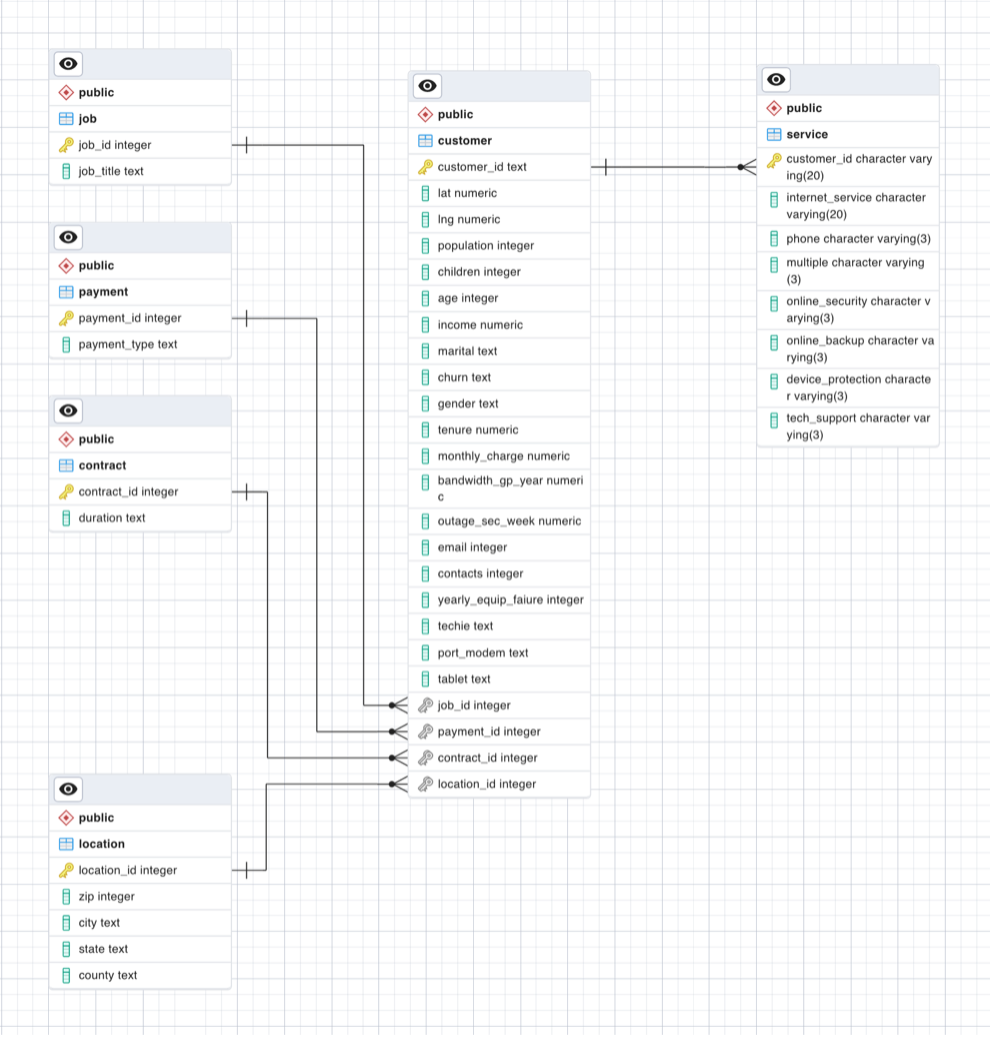

 
&emsp;The relational constraints demonstrated in the ERD above include attribute constraints, key and uniqueness constraints, referential integrity constraints, and entity integrity constraints.  Starting with attribute constraints, the data types of each column are specified after each column name to reflect the data they will hold. For instance, `lat` (numeric) and `long` (numeric) fields can only be entered as numbers in the `customer` table. The database will enforce the constraint by not allowing any character that is not a number to be entered into a `lat` or `long` field. 

&emsp;The key constraints are represented in the ERD through primary keys, the gold key icon, in each table. The `customer` table has a primary key of `customer_id` and is also used as the primary key in the `service` table. The `payment` table has a primary key of `payment_id` and so on throughout each table represented. The primary key used in each table also enforces the uniqueness constraint (as each primary key must be unique) and entity integrity constraints (as a primary key cannot be null). As such, the uniqueness and entity integrity constraints can be considered subsets of the key constraint. 

&emsp;Lastly, we have the referential integrity constraint shown in the above ERD through the gray key icon before a foreign key column name. In the `customer` table, we reference the primary key from the `job` table, `job_id`, to maintain the consistency and accuracy of job titles. This is also shown through `payment_id`, `contract_id`, and `location_id` to reference their respective tables consistently. The exception to the gray key icon is in the `service` table with its primary key gold icon. Here, the primary key of `customer_id` is the foreign key from the `customer` table, which means that every entry in the `service` table must have a `customer_id` that is unique, not null, and must already exist in the `customer` table. (<i>Constraints on relational database model</i>)

### 1. SQL code to create a table that accommodates logical model extension

`CREATE TABLE service (`

	customer_id varchar(20) PRIMARY KEY REFERENCES customer(customer_id),
	internet_service varchar(20), 
	phone varchar(3),
	multiple varchar(3),
	online_security varchar(3),
	online_backup varchar(3),
	device_protection varchar(3),
	tech_support varchar(3)
`);`

### 2.	SQL that loads data from the add-on CSV file into the new table

	"\\copy public.service (customer_id, internet_service, phone, multiple, online_security, online_backup, device_protection, tech_support) 
	FROM ‘C:\LabFiles\Services.csv ' 
	DELIMITER ',' 
	CSV HEADER QUOTE '\"' ESCAPE '''';"" 

The above code was accessed through the graphical user interface in pgAdmin 4, using the import tool (<i>Import CSV File Into PostgreSQL Table</i>), as shown below:

1. Right-click on the table name and select <b>Import/Export</b> data.

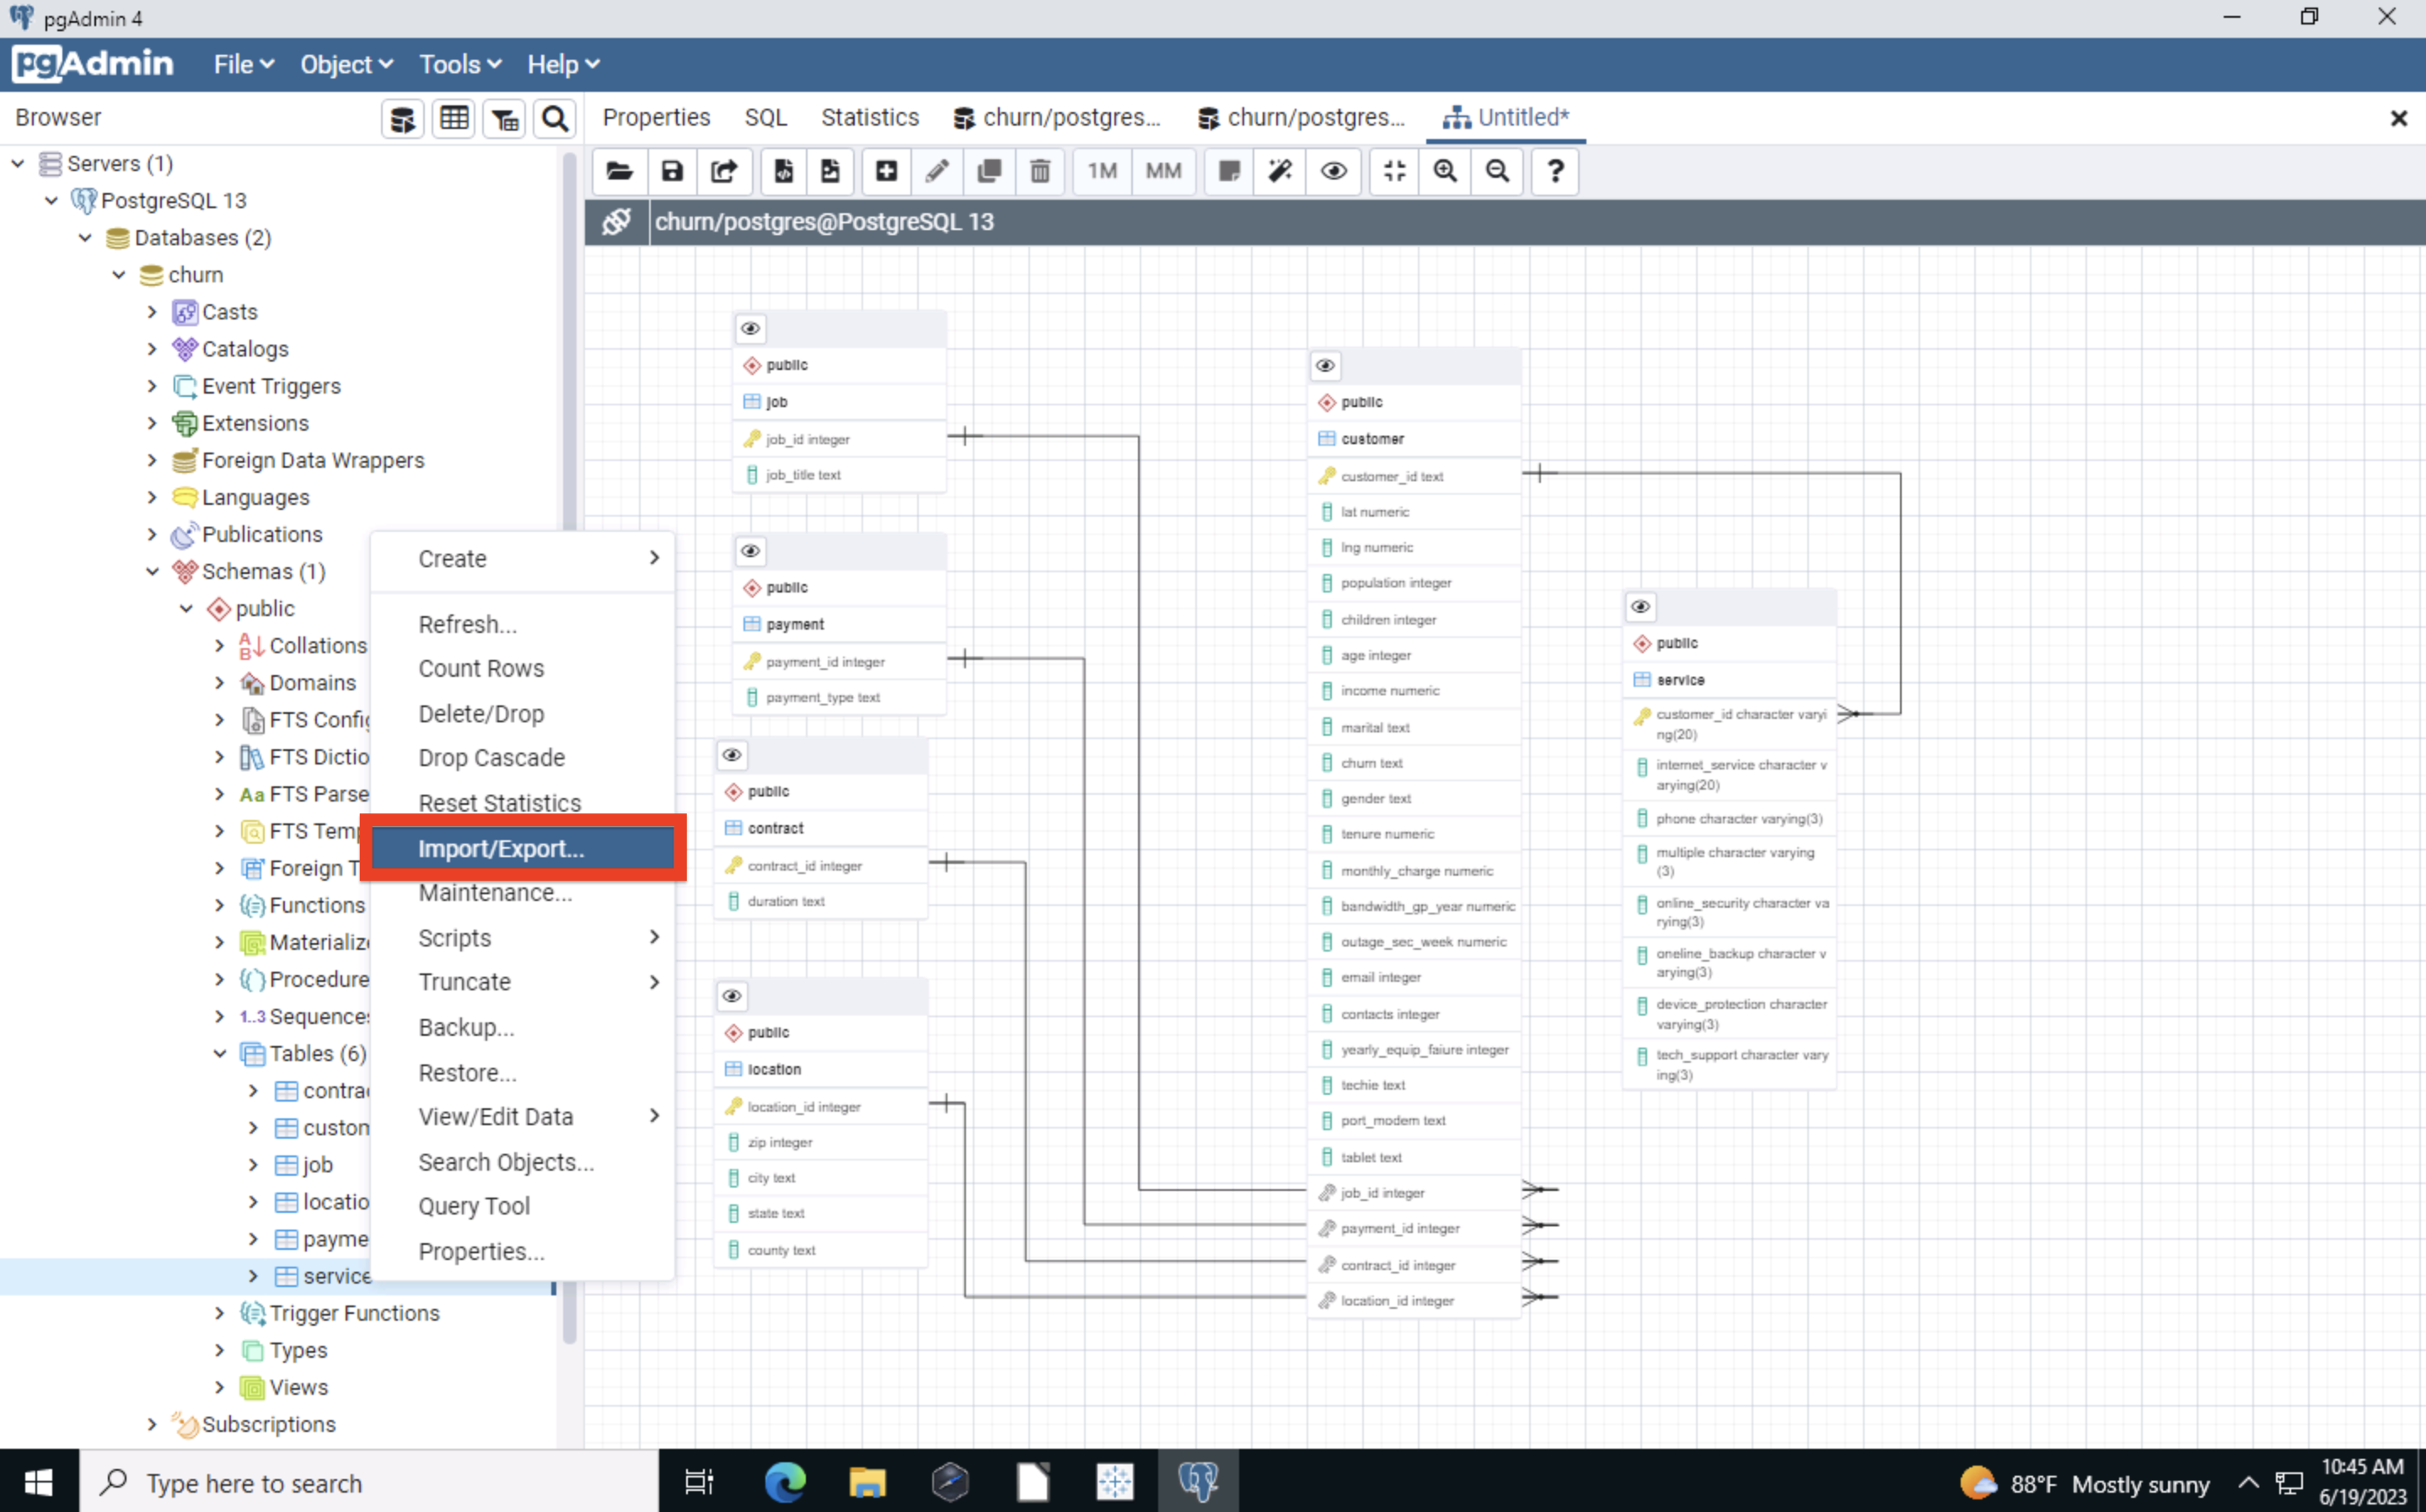

2. Ensure the <b>Import/Export</b> toggle is set to Import, enter “C:\LabFiles\Services.csv” as <b>Filename</b>, and select CSV for <b>Format</b>.  Ensure the <b>Header</b> toggle is on, select “,” from <b>Delimiter</b> drop-down menu, leave the rest of the settings as is, and click <b>OK</b>.

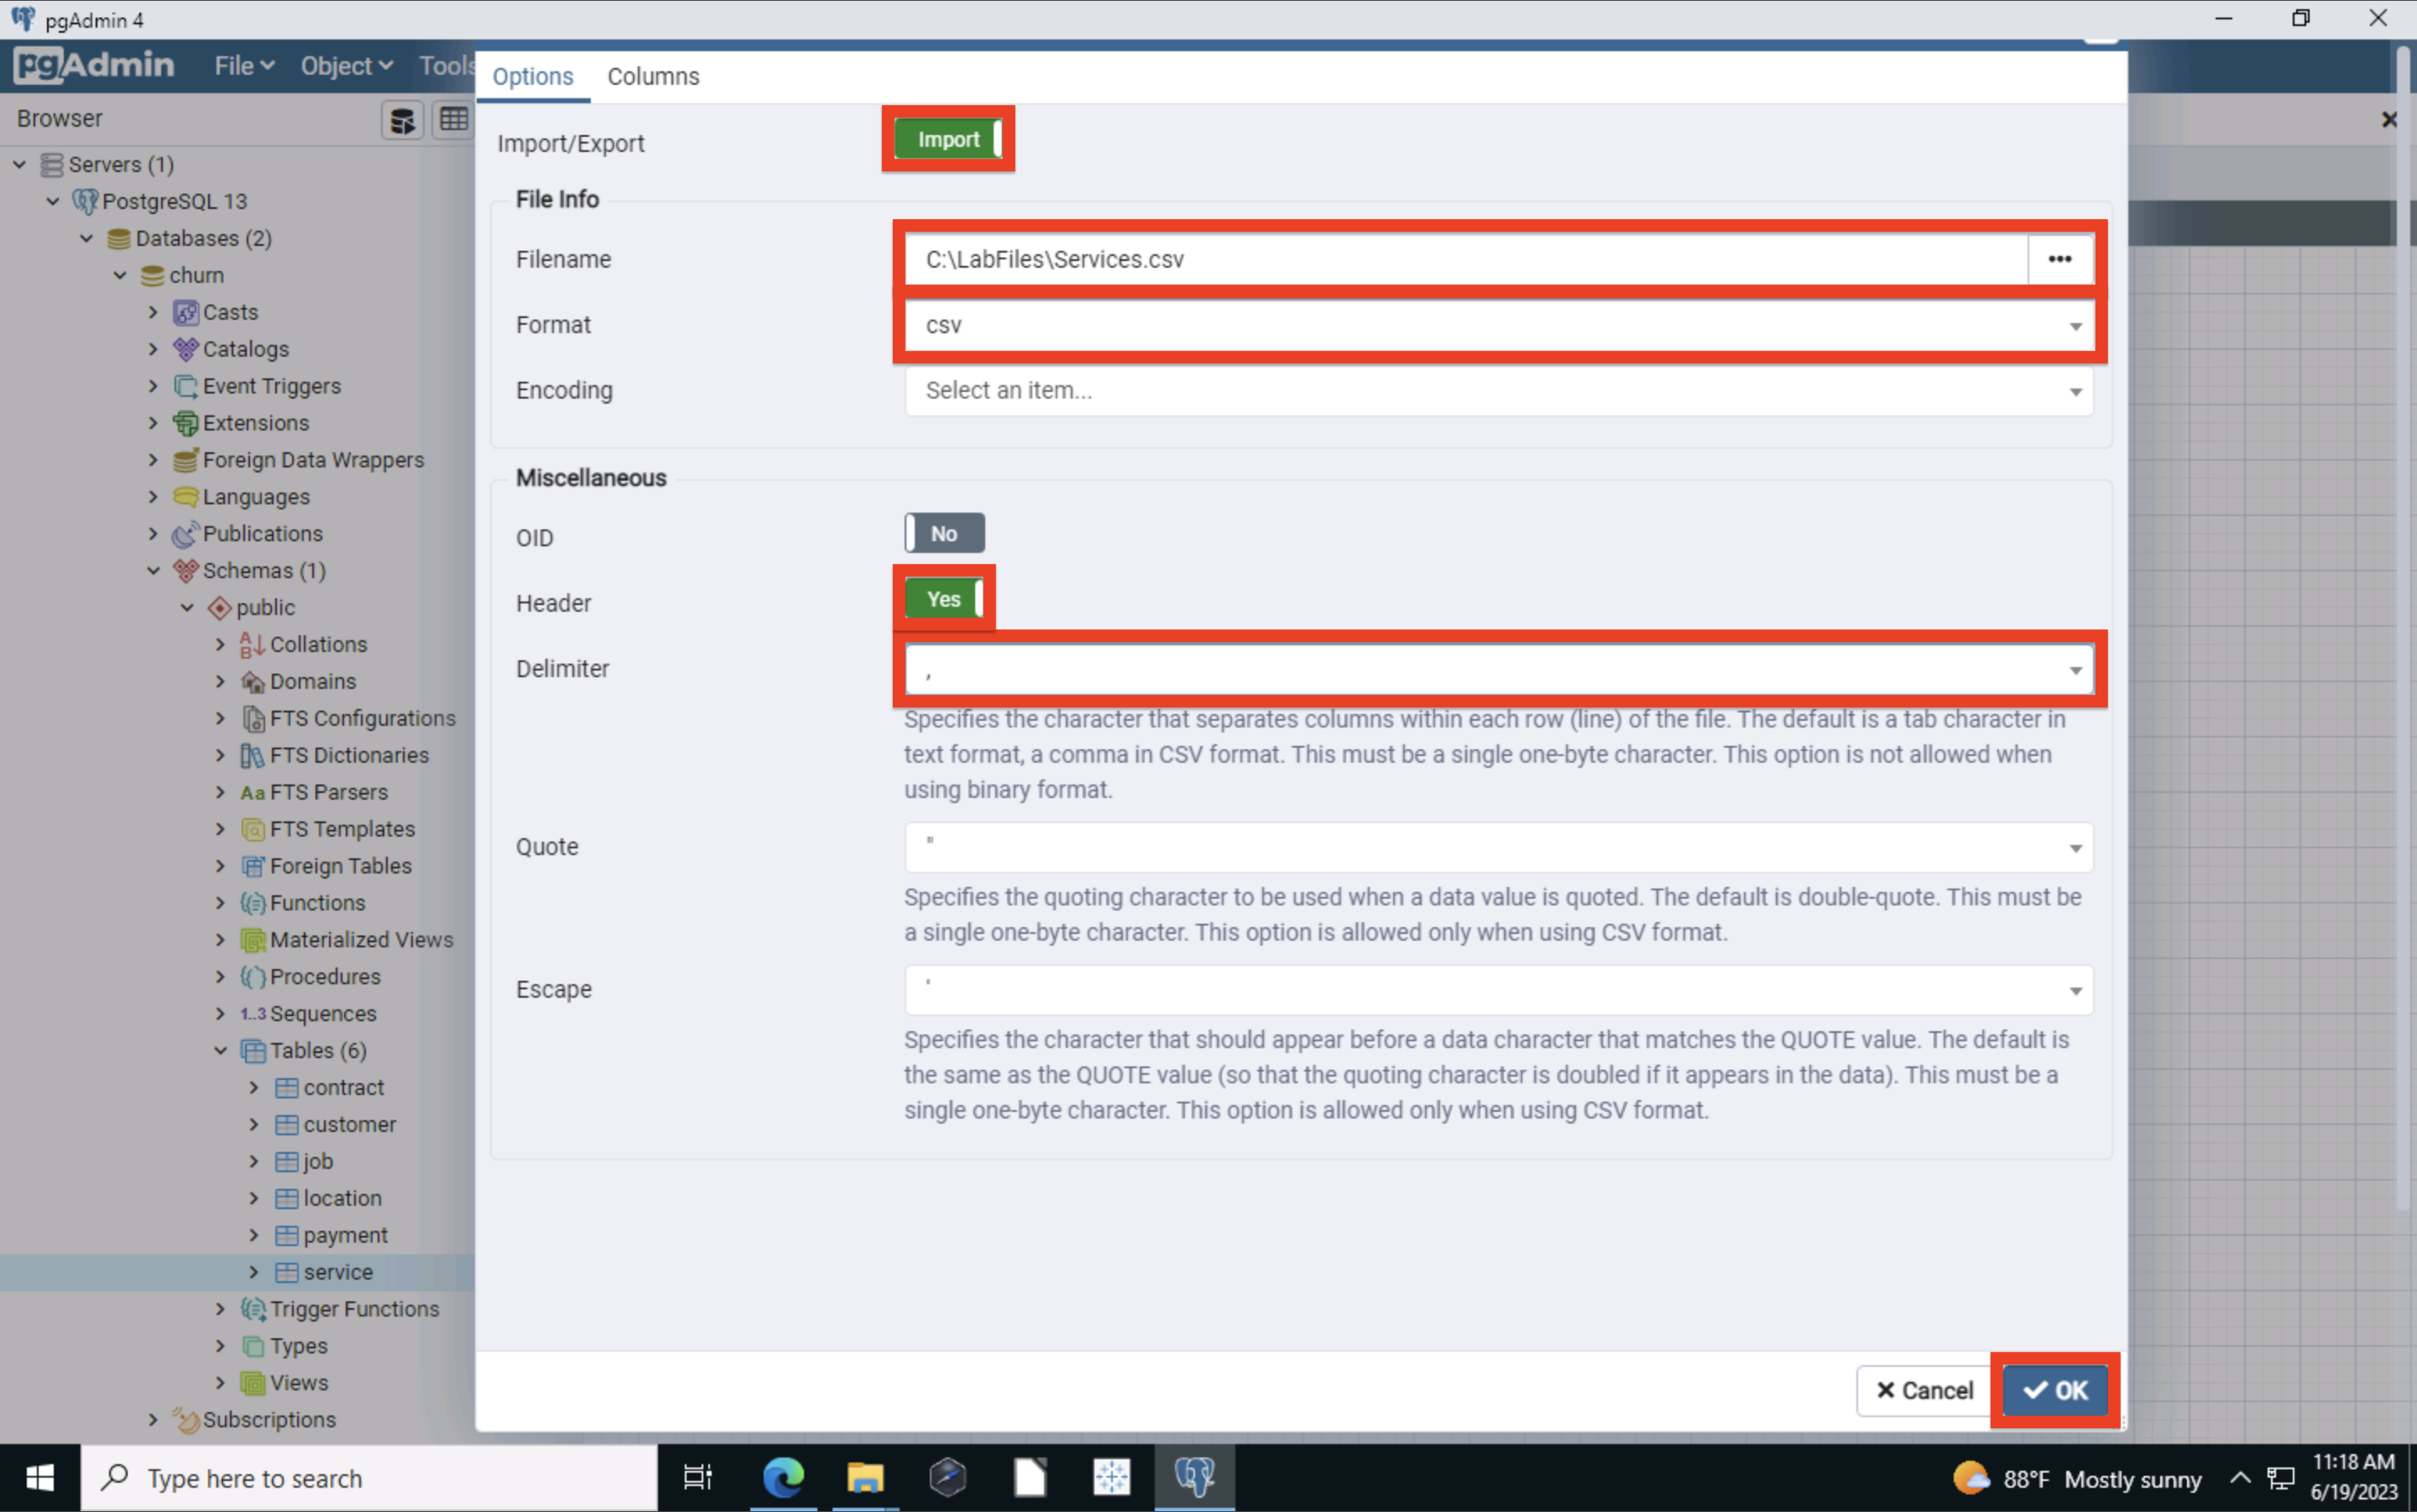

3. When the process is complete, select <b>More Details</b>.

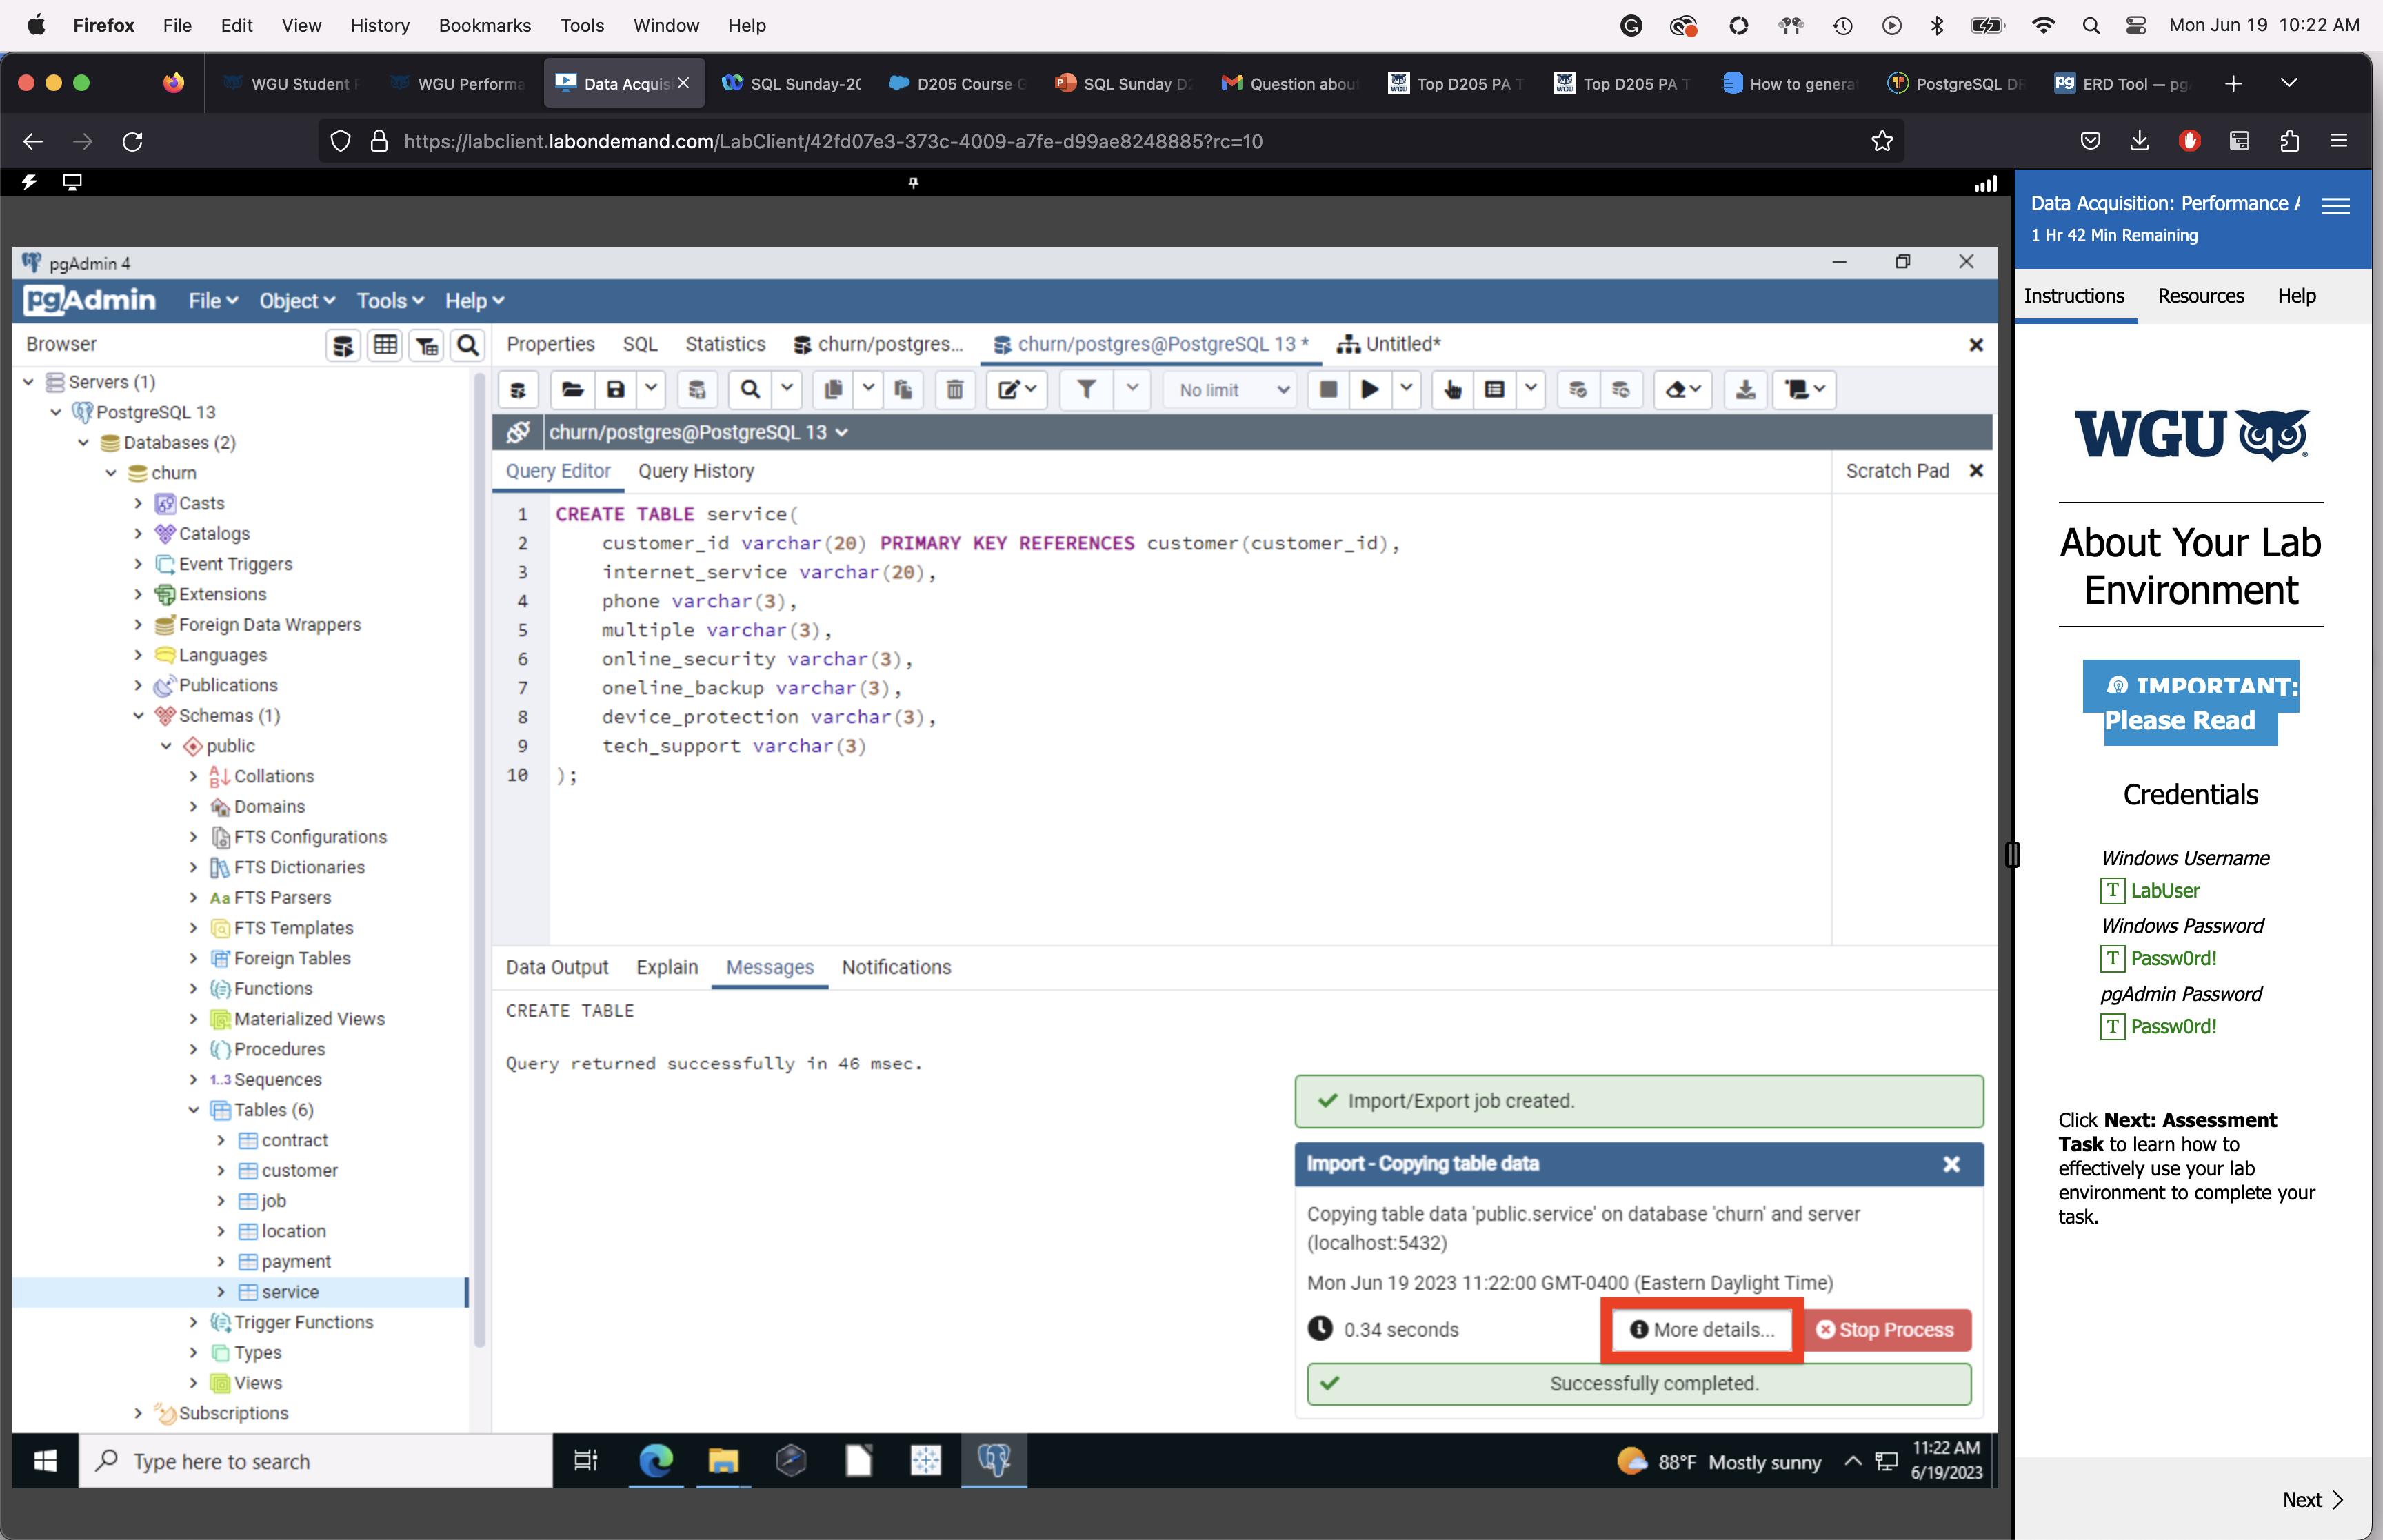

4. The command is found in <b>Process Watcher</b>, as shown below.

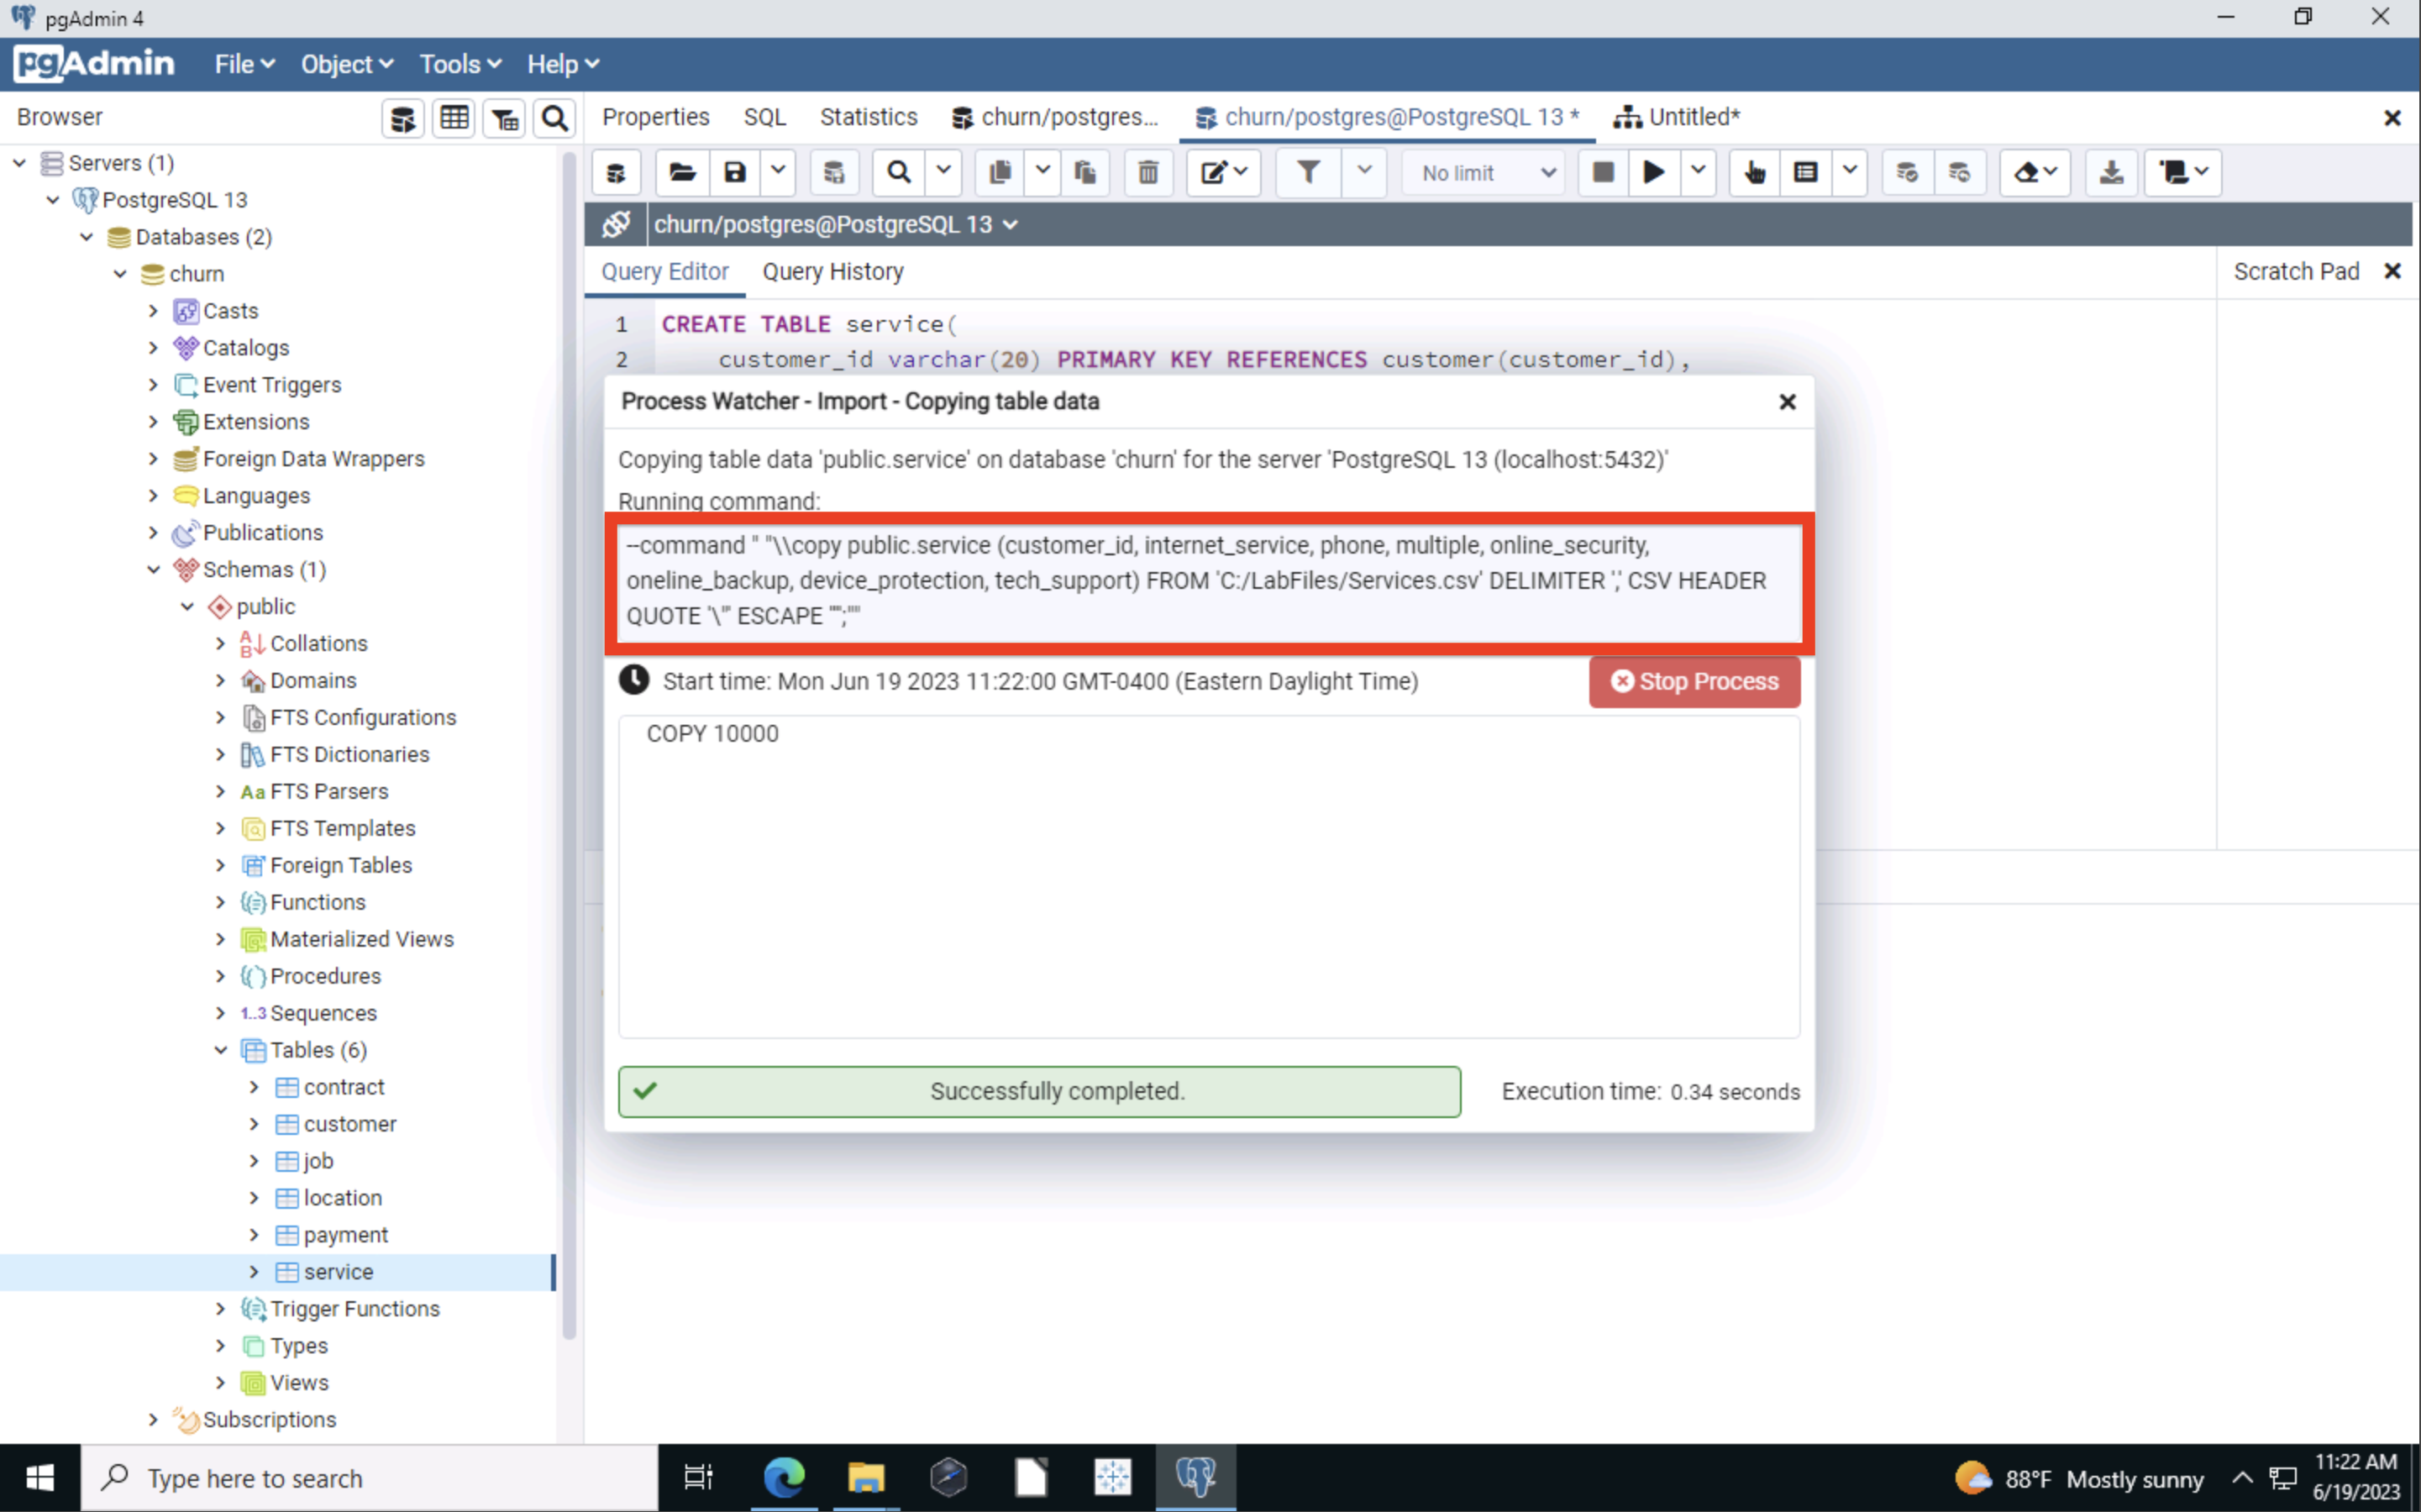

## C.	SQL Statement to inform research question from part A

    SELECT count(*), service.internet_service`
    FROM customer
    JOIN service
    ON customer.customer_id = service.customer_id 
    WHERE service.internet_service <> 'None'
    AND customer.tenure <= 3
    GROUP BY service.internet_service;

### 1. CSV file of the result

<div class="alert alert-block alert-info">
    Result.csv (included in project files)

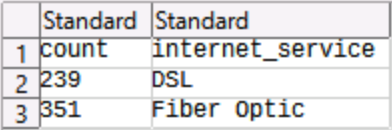

## D.	Updating of add-on file to remain relevant

&emsp;As a telecommunications company grows its fiber optic network, the sales team wants to know if new customers from the previous quarter are signing up for fiber optic or DSL internet service. The team plans to review the numbers on quarterly calls to see how the expansions affect their sales. These calls are scheduled for the second Friday of every quarter (i.e., the second Friday in January, April, July, and October). The services.csv file should be updated and refreshed in the database on the first Monday of every fiscal quarter to summarize how many new customers are coming from the fiber optic network versus the DSL network in the preceding quarter.

## E.	SQL Script that performs the process of loading add-on data

    "\\copy public.service (customer_id, internet_service, phone, multiple, online_security, online_backup, device_protection, tech_support) 
    FROM ‘C:\LabFiles\Services.csv ' 
    DELIMITER ',' 
    CSV HEADER QUOTE '\"' ESCAPE '''';""

## F.	Panopto video recording

Video included in project files or link below:

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=580dac11-f574-43f6-816c-b02700076b92 

## G.	Web Sources

No outside sources were used to gather data or third-party code.

## H.	References

>PostgreSQL Tutorial. (n.d.). <i>Import CSV File Into PostgreSQL Table</i>. PostgreSQL Tutorial. 	https://www.postgresqltutorial.com/postgresql-tutorial/import-csv-file-into-posgresql-table/

>Page, D. (n.d.-a). <i>ERD tool</i>. ERD Tool - pgAdmin 4 7.3 documentation. 	https://www.pgadmin.org/docs/pgadmin4/development/erd_tool.html 

>GeeksforGeeks. (2023, April 7). <i>Constraints on Relational Database Model</i>. GeeksforGeeks. 	https://www.geeksforgeeks.org/constraints-on-relational-database-model/ 